<a href="https://colab.research.google.com/github/Bhavya171/LLM_From_Scratch/blob/main/LLM_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Project 2

## Introduction
Here I have fine-tuned the ResNet50 model on CIFAR100 dataset using TensorFlow and keras

## 1.Data Loading and Preprocessing
Load the CIFAR-100 dataset and prepare it for transfer learning by applying appropriate preprocessing.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# 1. Load CIFAR-100 data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# 2. Resize using a generator (resizes + preprocesses on-the-fly)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_resnet50
)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_resnet50
)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


### Model Architecture

This is the architecture of the ResNet50 model before fine tuning.

In [ ]:
ResNet50(weights = 'imagenet').summary()


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

## 2.Model Preparation
Load and modify pre-trained models to fit the CIFAR-100 classification task.

In [ ]:
def resize_generator(X, y, batch_size=32):
    def generator_fn():
        for i in range(0, len(X), batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            X_resized = tf.image.resize(X_batch, [224, 224])
            X_processed = preprocess_resnet50(X_resized.numpy())
            yield X_processed, y_batch.squeeze()
    return tf.data.Dataset.from_generator(
        generator_fn,
        output_signature=(
            tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None,), dtype=tf.int64)
        )
    ).prefetch(1)

train_dataset = resize_generator(X_train, y_train, batch_size=32)
test_dataset = resize_generator(X_test, y_test, batch_size=32)


In [ ]:
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model Architecture after modifying the model

In [ ]:
model_resnet50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,788,388 (98.37 MB)

 Trainable params: 25,735,268 (98.17 MB)

 Non-trainable params: 53,120 (207.50 KB)

## 3.Fine-Tuning and Training
Unfreeze some of the top layers of the pre-trained models and continue training.

In [ ]:
# 4. Fine-tuning setup
for layer in base_model_resnet50.layers[:143]:
    layer.trainable = False
for layer in base_model_resnet50.layers[143:]:
    layer.trainable = True

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_resnet50.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
   1563/Unknown 228s 131ms/step - accuracy: 0.4976 - loss: 1.9220

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 264s 154ms/step - accuracy: 0.4977 - loss: 1.9216 - val_accuracy: 0.6914 - val_loss: 1.0226
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 230s 147ms/step - accuracy: 0.7620 - loss: 0.7823 - val_accuracy: 0.7159 - val_loss: 1.0028
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 224s 144ms/step - accuracy: 0.8694 - loss: 0.4194 - val_accuracy: 0.7214 - val_loss: 1.1280
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 144ms/step - accuracy: 0.9242 - loss: 0.2376 - val_accuracy: 0.7227 - val_loss: 1.2306
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 226s 144ms/step - accuracy: 0.9424 - loss: 0.1708 - val_accuracy: 0.7282 - val_loss: 1.3973
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 144ms/step - accuracy: 0.9599 - loss: 0.1212 - val_accuracy: 0.7358 - val_loss: 1.3639
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 144ms/step - accuracy: 0.9682 - loss: 0.0978 - val_accuracy: 0.7367 - val_loss: 1.4326
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 224s 143ms/step - accuracy: 0.9

## 4.Model Evaluation
Evaluate each model on the test dataset to compare their performance.

In [ ]:
acc_resnet50 = model_resnet50.evaluate(test_dataset)[1]
print(f"ResNet50 Accuracy: {acc_resnet50:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.7468 - loss: 1.5196
ResNet50 Accuracy: 0.75


## 5.Saving the model to cloud

In [ ]:
model_resnet50.save("/content/drive/MyDrive/model_resnet50.h5")

## 6.Testing the model

p.s. if you want you can delete runtime and check it is being uploaded from the cloud

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1ruFTqK4gFNAVKtRaKQLWHiTH0Weoz8YH -O model_resnet50.h5
!gdown --id 1kFUEN4ipK8RSojR-8BmO7kDWtMYPfJhd -O bed.jpg
!gdown --id 1BReyGVLRGEux4ARVjh-r_m8raVJfz9qF -O apple.jpg

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ruFTqK4gFNAVKtRaKQLWHiTH0Weoz8YH
From (redirected): https://drive.google.com/uc?id=1ruFTqK4gFNAVKtRaKQLWHiTH0Weoz8YH&confirm=t&uuid=d4857311-9fc1-4ce8-ae2e-dfa005e1c9d0
To: /content/model_resnet50.h5
100% 241M/241M [00:03<00:00, 69.2MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kFUEN4ipK8RSojR-8BmO7kDWtMYPfJhd
To: /content/bed.jpg
100% 124k/124k [00:00<00:00, 55.2MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in

In [ ]:
import tensorflow as tf

loaded_model = tf.keras.models.load_model("model_resnet50.h5")

In [ ]:
output = []

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted class: 0


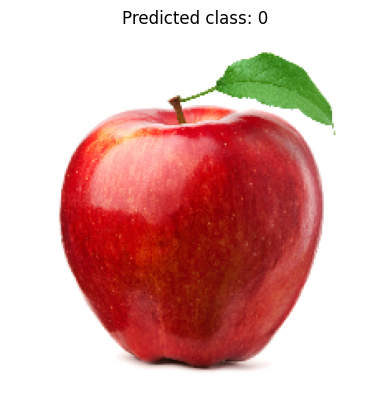

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
import matplotlib.pyplot as plt

img_path = '/content/apple.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_resnet50(img_array)

pred_probs = loaded_model.predict(img_preprocessed)
predicted_class = np.argmax(pred_probs, axis=1)[0]
output.append(predicted_class)

print(f"Predicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
Predicted class: 3


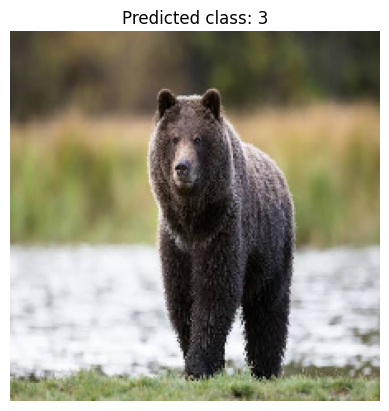

In [ ]:
img_path = '/content/bear.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_resnet50(img_array)

pred_probs = loaded_model.predict(img_preprocessed)
predicted_class = np.argmax(pred_probs, axis=1)[0]
output.append(predicted_class)

print(f"Predicted class: {predicted_class}")
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar100

label_list = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree',
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy',
    'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
    'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]
print(f"Predicted class index: {output[0]}, {output[1]} respectively.")
print(f"Predicted label: {label_list[output[0]]}, {label_list[output[1]]} respectively.")

Predicted class index: 0, 3 respectively.
Predicted label: apple, bear respectively.
